In [62]:
import json

In [63]:
!pip install transformers

In [64]:
import torch
import pandas as pd
import numpy as np

In [65]:
import urllib.request

def getEntries ( url):
    
    request = urllib.request.Request (url   , None, {'User-Agent' : 'test'})
    response = urllib.request.urlopen (request)
    
    return json.loads(response.read())


In [66]:
df_disease_symptoms  = pd.read_csv("https://raw.githubusercontent.com/mcelikkaya/medium_articles2/main/dataset.csv")
df_disease_symptoms = df_disease_symptoms.fillna("")
df_disease_symptoms.head( 5 )

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [67]:
df_symptom_description  = pd.read_csv("https://raw.githubusercontent.com/mcelikkaya/medium_articles2/main/symptom_Description.csv")
df_symptom_description = df_symptom_description.fillna("")
df_symptom_description.head( 5 )

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [68]:
df_symptom_precaution  = pd.read_csv("https://raw.githubusercontent.com/mcelikkaya/medium_articles2/main/symptom_precaution.csv")
df_symptom_precaution = df_symptom_precaution.fillna("")
df_symptom_precaution.head( 5 )

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [69]:
def get_df_as_map(df):
    disease_list = df.to_numpy().tolist()
    diease_map = {}
    for disease_row in disease_list:
        disease = disease_row[0]
        #print(disease)
        if disease not in diease_map.keys():
            diease_map[disease] = []        
        for symptom in disease_row[1:]:
            if "" != symptom and symptom not in diease_map[disease]:            
                diease_map[disease].append(symptom)
    return diease_map

In [140]:
df_disease_symptoms_map = get_df_as_map( df_disease_symptoms)
df_symptom_precaution_map = get_df_as_map( df_symptom_precaution)
df_symptom_description_map = get_df_as_map( df_symptom_description)


In [141]:
df_disease_symptoms_questions = ["What is problem if,I have","What happens if,I feel",
                                 "What does it show when I have a problem as","What happend when my problem is"]
df_symptom_precaution_questions = ["What must I do","What is treatment","What can I do","What do you advice"]
df_symptom_description_questions =["What is","How do you define","What happens when you are","How do you understand"]

In [142]:
disease_text_map = {}
for disease in df_disease_symptoms_map.keys():
    try:
        #print(disease)
        symptoms = df_disease_symptoms_map[disease]
        precautions = df_symptom_precaution_map[disease]
        description = df_symptom_description_map[disease.strip()]    
        
        desc = description[0]
        symptoms_text = " ".join(symptoms )
        precautions_text =  " ".join(precautions )
        text =   desc #
        text +=  "The name of disease is "+ disease 
        text += " is an illness when you have " + symptoms_text + " ."
        text += " You must " + precautions_text + " ."
        #print(text)
        disease_text_map[disease] = [text,desc,symptoms_text,precautions_text]
    except:
        print("Error in disease",disease)

Error in disease Dimorphic hemmorhoids(piles)


In [178]:
train_contexts = []
train_questions = []
train_answers = []

val_contexts = []
val_questions = []
val_answers = []

In [179]:
from textwrap import wrap

disease = list( disease_text_map.keys() )[0]
text = disease_text_map[disease][0]
desc = disease_text_map[disease][1]
symptoms_text = disease_text_map[disease][2]
precautions_text = disease_text_map[disease][3]
print("text :","\n".join(wrap(text, 120)) )
print("-----")
print("desc :","\n".join(wrap(desc, 120))) 
print("--")
print("symptoms_text : ",symptoms_text)
print("precautions_text : ",precautions_text)


text : In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune
system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in
the human body. Like many microbes, there are helpful fungi and harmful fungi.The name of disease is Fungal infection is
an illness when you have itching  skin_rash  nodal_skin_eruptions  dischromic _patches . You must bath twice use detol
or neem in bathing water keep infected area dry use clean cloths .
-----
desc : In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune
system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in
the human body. Like many microbes, there are helpful fungi and harmful fungi.
--
symptoms_text :  itching  skin_rash  nodal_skin_eruptions  dischromic _patches
precautions_text :  bath twice u

In [180]:
for disease in disease_text_map.keys():
    text = disease_text_map[disease][0]
    desc = disease_text_map[disease][1]
    symptoms_text = disease_text_map[disease][2]
    precautions_text = disease_text_map[disease][3]
    
    
    #for index_symptom,symptom_description_question in enumerate( df_symptom_description_questions):
    #    if index_symptom < 2:
    #      train_contexts.append( text )
    #      train_questions.append( symptom_description_question + " " + disease )
    #      train_answers.append( {'text': desc, 'answer_start': text.find(desc)} )
    #    else:
    #      val_contexts.append( text )
    #      val_questions.append( symptom_description_question + " " + disease )
    #      val_answers.append( {'text': desc, 'answer_start': text.find(desc)} )  
        
    for index_description,symptom_description_question in enumerate(df_disease_symptoms_questions):
        if index_description < 2:
          train_contexts.append( text )
          train_questions.append( symptom_description_question + " " + symptoms_text + " ? " )
          train_answers.append( {'text': disease, 'answer_start': text.find(disease)} ) 
        else:
          val_contexts.append( text )
          val_questions.append( symptom_description_question + " " + symptoms_text + " ? ")
          val_answers.append( {'text': disease, 'answer_start': text.find(disease)} )    
        
    for index_precaution,symptom_precaution_question in enumerate(df_symptom_precaution_questions):
        if index_precaution < 2: 
          train_contexts.append( text )
          train_questions.append( symptom_precaution_question + " for " + disease + " ? ")
          train_answers.append( {'text': precautions_text, 'answer_start': text.find(precautions_text)} ) 
        else:
          val_contexts.append( text )
          val_questions.append( symptom_precaution_question + " for " + disease + " ? ")
          val_answers.append( {'text': precautions_text, 'answer_start': text.find(precautions_text)} )   

In [181]:
def dump_index(index):
  print("train_questions",train_questions[index])  
  print("train_answers",train_answers[index])
  print("val_question:",val_questions[index])
  print("val_answers:",val_answers[index])
  


In [182]:
dump_index(0)

train_questions What is problem if,I have itching  skin_rash  nodal_skin_eruptions  dischromic _patches ? 
train_answers {'text': 'Fungal infection', 'answer_start': 341}
val_question: What does it show when I have a problem as itching  skin_rash  nodal_skin_eruptions  dischromic _patches ? 
val_answers: {'text': 'Fungal infection', 'answer_start': 341}


In [183]:
#dump_index(1)
dump_index(2)

train_questions What must I do for Fungal infection ? 
train_answers {'text': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths', 'answer_start': 459}
val_question: What can I do for Fungal infection ? 
val_answers: {'text': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths', 'answer_start': 459}


In [184]:
dump_index(3)

train_questions What is treatment for Fungal infection ? 
train_answers {'text': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths', 'answer_start': 459}
val_question: What do you advice for Fungal infection ? 
val_answers: {'text': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths', 'answer_start': 459}


In [185]:
#for ii in range(len(train_questions)):
#  print(ii,"-----------------")
#  dump_index(ii)

In [186]:
#for ii in range(len(train_questions)):
#  print(ii,"-----------------")
#  dump_index(ii)

import pandas as pd
df = pd.DataFrame()
df["train_questions"] =train_questions 
df["train_answers"] =train_answers 
df["val_questions"] =val_questions 
df["val_answers"] =val_answers  
df

,train_questions,train_answers,val_questions,val_answers
0,"What is problem if,I have itching skin_rash ...","{'text': 'Fungal infection', 'answer_start': 341}",What does it show when I have a problem as itc...,"{'text': 'Fungal infection', 'answer_start': 341}"
1,"What happens if,I feel itching skin_rash nod...","{'text': 'Fungal infection', 'answer_start': 341}",What happend when my problem is itching skin_...,"{'text': 'Fungal infection', 'answer_start': 341}"
2,What must I do for Fungal infection ?,{'text': 'bath twice use detol or neem in bath...,What can I do for Fungal infection ?,{'text': 'bath twice use detol or neem in bath...
3,What is treatment for Fungal infection ?,{'text': 'bath twice use detol or neem in bath...,What do you advice for Fungal infection ?,{'text': 'bath twice use detol or neem in bath...
4,"What is problem if,I have continuous_sneezing...","{'text': 'Allergy', 'answer_start': 261}",What does it show when I have a problem as co...,"{'text': 'Allergy', 'answer_start': 261}"
...,...,...,...,...
155,What is treatment for Psoriasis ?,{'text': 'wash hands with warm soapy water sto...,What do you advice for Psoriasis ?,{'text': 'wash hands with warm soapy water sto...
156,"What is problem if,I have skin_rash high_fev...","{'text': 'Impetigo', 'answer_start': 0}",What does it show when I have a problem as sk...,"{'text': 'Impetigo', 'answer_start': 0}"
157,"What happens if,I feel skin_rash high_fever ...","{'text': 'Impetigo', 'answer_start': 0}",What happend when my problem is skin_rash hi...,"{'text': 'Impetigo', 'answer_start': 0}"
158,What must I do for Impetigo ?,{'text': 'soak affected area in warm water use...,What can I do for Impetigo ?,{'text': 'soak affected area in warm water use...


In [187]:
print("\n ".join( train_questions[10:16]) )
print(train_answers[10:16])


print("\n ".join( val_questions[0:6]) )
print(val_answers[0:6])

What must I do for GERD ? 
 What is treatment for GERD ? 
 What is problem if,I have itching  vomiting  yellowish_skin  nausea  loss_of_appetite  abdominal_pain  yellowing_of_eyes ? 
 What happens if,I feel itching  vomiting  yellowish_skin  nausea  loss_of_appetite  abdominal_pain  yellowing_of_eyes ? 
 What must I do for Chronic cholestasis ? 
 What is treatment for Chronic cholestasis ? 
[{'text': 'avoid fatty spicy food avoid lying down after eating maintain healthy weight exercise', 'answer_start': 404}, {'text': 'avoid fatty spicy food avoid lying down after eating maintain healthy weight exercise', 'answer_start': 404}, {'text': 'Chronic cholestasis', 'answer_start': 264}, {'text': 'Chronic cholestasis', 'answer_start': 264}, {'text': 'cold baths anti itch medicine consult doctor eat healthy', 'answer_start': 418}, {'text': 'cold baths anti itch medicine consult doctor eat healthy', 'answer_start': 418}]
What does it show when I have a problem as itching  skin_rash  nodal_skin_e

In [188]:
print("text :","\n".join(wrap(train_contexts[3], 120)) )
print("\nQuestion:",train_questions[3])
print(train_answers[3])

text : In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune
system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in
the human body. Like many microbes, there are helpful fungi and harmful fungi.The name of disease is Fungal infection is
an illness when you have itching  skin_rash  nodal_skin_eruptions  dischromic _patches . You must bath twice use detol
or neem in bathing water keep infected area dry use clean cloths .

Question: What is treatment for Fungal infection ? 
{'text': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths', 'answer_start': 459}


In [174]:
print(train_contexts[len(train_contexts)-1])
print("\n\ntrain_questions:",train_questions[len(train_contexts)-1])
print(train_answers[len(train_contexts)-1])

Impetigo (im-puh-TIE-go) is a common and highly contagious skin infection that mainly affects infants and children. Impetigo usually appears as red sores on the face, especially around a child's nose and mouth, and on hands and feet. The sores burst and develop honey-colored crusts.The name of disease is Impetigo is an illness when you have  skin_rash  high_fever  blister  red_sore_around_nose  yellow_crust_ooze . You must soak affected area in warm water use antibiotics remove scabs with wet compressed cloth consult doctor .


train_questions: What is treatment for Impetigo ? 
{'text': 'soak affected area in warm water use antibiotics remove scabs with wet compressed cloth consult doctor', 'answer_start': 427}


In [86]:
print(len(train_contexts))
print(len(train_questions))
print(len(train_answers))

160
160
160


In [87]:
print(len(val_contexts))
print(len(val_questions))
print(len(val_answers))

160
160
160


In [88]:
#TODO
def add_end_idx(answers, contexts):
    for answer, context in zip(answers, contexts):
        gold_text = answer['text']
        start_idx = answer['answer_start']
        end_idx = start_idx + len(gold_text)

        # sometimes squad answers are off by a character or two – fix this
        if context[start_idx:end_idx] == gold_text:
            answer['answer_end'] = end_idx
        elif context[start_idx-1:end_idx-1] == gold_text:
            answer['answer_start'] = start_idx - 1
            answer['answer_end'] = end_idx - 1     # When the gold label is off by one character
        elif context[start_idx-2:end_idx-2] == gold_text:
            answer['answer_start'] = start_idx - 2
            answer['answer_end'] = end_idx - 2     # When the gold label is off by two characters

add_end_idx(train_answers, train_contexts)
add_end_idx(val_answers, val_contexts)

In [89]:
print(train_contexts[0])
print("\n\ntrain_questions:",train_questions[0])
print(train_answers[0])

In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.The name of disease is Fungal infection is an illness when you have itching  skin_rash  nodal_skin_eruptions  dischromic _patches . You must bath twice use detol or neem in bathing water keep infected area dry use clean cloths .


train_questions: I have itching  skin_rash  nodal_skin_eruptions  dischromic _patches
{'text': 'Fungal infection', 'answer_start': 341, 'answer_end': 357}


In [90]:
starts = [t["answer_start"] for t in train_answers]
ends = [t["answer_end"] for t in train_answers]
print("starts",starts)
print("ends",ends)
#[t["answer_start"] for t in train_answers]
#[t["answer_end"] for t in train_answers]
starts0s = [t for t in starts if t == 0]
print(len(starts0s))

starts [341, 341, 459, 459, 261, 261, 368, 368, 36, 36, 404, 404, 264, 264, 418, 418, 225, 225, 353, 353, 287, 287, 439, 439, 36, 36, 386, 386, 0, 0, 509, 509, 0, 0, 384, 384, 322, 322, 453, 453, 0, 0, 373, 373, 188, 188, 519, 519, 0, 0, 395, 395, 275, 275, 409, 409, 184, 184, 473, 473, 251, 251, 380, 380, 286, 286, 478, 478, 60, 60, 481, 481, 97, 97, 463, 463, 65, 65, 428, 428, 0, 0, 533, 533, 275, 275, 412, 412, 0, 0, 474, 474, 241, 241, 541, 541, 0, 0, 481, 481, 0, 0, 550, 550, 217, 217, 489, 489, 0, 0, 439, 439, 230, 230, 330, 330, 128, 128, 404, 404, 0, 0, 448, 448, 0, 0, 473, 473, 1, 1, 556, 556, 214, 214, 353, 353, 0, 0, 400, 400, 288, 288, 446, 446, 0, 0, 407, 407, 0, 0, 401, 401, 0, 0, 465, 465, 0, 0, 427, 427]
ends [357, 357, 544, 544, 268, 268, 434, 434, 40, 40, 489, 489, 283, 283, 474, 474, 238, 238, 420, 420, 306, 306, 513, 513, 40, 40, 447, 447, 9, 9, 561, 561, 15, 15, 474, 474, 338, 338, 528, 528, 13, 13, 425, 425, 196, 196, 586, 586, 20, 20, 469, 469, 303, 303, 452, 452

In [91]:
#Open to see question and context
#for q,a in zip( val_questions, val_answers):
#  print(":",q)
#  print( a["text"])

In [92]:
#Open comment to see question and answer
#for q,a in zip( train_questions, train_answers):
#  print(q)
#  print( a["text"])

In [93]:
print(type(train_contexts))
print(type(train_questions))
print(train_contexts[0])
print(train_questions[0] )

<class 'list'>
<class 'list'>
In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.The name of disease is Fungal infection is an illness when you have itching  skin_rash  nodal_skin_eruptions  dischromic _patches . You must bath twice use detol or neem in bathing water keep infected area dry use clean cloths .
I have itching  skin_rash  nodal_skin_eruptions  dischromic _patches


In [94]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
val_encodings = tokenizer(val_contexts, val_questions, truncation=True, padding=True)

In [189]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [95]:
def add_token_positions(encodings, answers):
    start_positions = []
    end_positions = []
    for i in range(len(answers)):
        start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
        end_positions.append(encodings.char_to_token(i, answers[i]['answer_end'] - 1))

        # if start position is None, the answer passage has been truncated
        if start_positions[-1] is None:          
            #print("start_positions minus,",answers[i])
            start_positions[-1] = tokenizer.model_max_length
        if end_positions[-1] is None:
            #print("end_positions minus,",answers[i])
            end_positions[-1] = tokenizer.model_max_length

    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

In [96]:
len(train_encodings["start_positions"])

160

In [97]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

train_dataset = CustomDataset(train_encodings)
val_dataset = CustomDataset(val_encodings)

In [98]:
from transformers import DistilBertForQuestionAnswering
model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [99]:
from torch.utils.data import DataLoader
from transformers import AdamW

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

_ = model.to(device)

In [100]:
def eval_loader(batch_size=16,dump_equals=False):
    t1 = time()
    model.eval()
    acc = []
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    dump_count = 0
    eval_data = []
    for batch in val_loader:
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            start_true = batch['start_positions'].to(device)
            end_true = batch['end_positions'].to(device)
            # make predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            # get top prediction with argmax
            start_pred = torch.argmax(outputs['start_logits'], dim=1)
            end_pred = torch.argmax(outputs['end_logits'], dim=1)
            # calculate accuracy 
            acc.append(((start_pred == start_true).sum()/len(start_pred)).item())
            acc.append(((end_pred == end_true).sum()/len(end_pred)).item())

            eval_data.append( [start_pred , start_true,end_pred , end_true ])

            if dump_equals and dump_count < 14 and start_pred == start_true and end_pred == end_true:
              dump_count += 1
              tokens = tokenizer.convert_ids_to_tokens(batch['input_ids'][0])
              pred = get_text_atrange(  tokens,start_pred[0],end_pred[0] )
              print("tokens",pred )
              print("start_pred == start_true",start_pred , start_true)
              print("end_pred == end_true",end_pred , end_true)
              print("--")
    # calculate  accuracy in total
    acc = sum(acc)/len(acc)
    t2 = time()      
    elapsed = t2 - t1
    print('Elapsed time for eval %f seconds.' % elapsed)
    return acc ,eval_data

In [101]:
from time import time
import matplotlib.pyplot as plt

def train_model():
  t1 = time()
  model.train()
  train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
  optim = AdamW(model.parameters(), lr=5e-5)
  outputs_model = []
  for epoch in range(1):
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        if len(outputs_model) == 0:
          outputs_model.append(outputs)
        loss = outputs[0]
        loss.backward()
        optim.step()
  t2 = time()      
  elapsed = t2 - t1
  print('Elapsed time for training %f seconds.' % elapsed)
  return outputs_model

#start_pred , start_true,end_pred , end_true
def plot_eval_old(eval_data):
  pred_x = []
  pred_y = []
  true_x = []
  true_y = []
  for e_data in eval_data:
    if e_data[3].item() - e_data[1].item() > 30:
      continue
    pred_x.append( e_data[0].item() )
    true_x.append( e_data[1].item() )
    pred_y.append( e_data[2].item() )
    true_y.append( e_data[3].item() )
  plt.scatter(pred_x,pred_y,color="blue",label="prediction")
  plt.scatter(true_x,true_y,color="orange",label="true")
  plt.legend()  
  plt.show()
  plt.plot(pred_x,pred_y,color="blue",label="prediction",linestyle='-')
  plt.plot(true_x,true_y,color="orange",label="true")
  plt.legend()
  plt.show()

def plot_eval(eval_data):
  fig, axes = plt.subplots(3,1)
  fig.set_size_inches(11, 8)
  axes[0].set_title("Prediction")
  axes[1].set_title("Actual")
  axes[2].set_title("Combined")
  for index,e_data in enumerate(eval_data):
    start_pred , end_pred =  e_data[0] , e_data[2]
    start_true , end_true =  e_data[1] , e_data[3]
    
    if abs(start_true - end_true) < 100:
      axes[0].plot([index,index],[start_pred,end_pred],color="blue",linestyle='-')
      axes[1].plot([index,index],[start_true,end_true],color="orange")  

      axes[2].plot([index*2,index*2],[start_pred,end_pred],color="blue",linestyle='-')
      axes[2].plot([index*2+1,index*2+1],[start_true,end_true],color="orange")  

      #axes[3].plot([index*2+1,index*2+1],[start_true,end_true],color="orange")  
      #axes[3].plot([index*2,index*2],[start_pred,end_pred],color="blue",linestyle='-')
      
  fig.tight_layout()    

      
      

Elapsed time for eval 1.218337 seconds.


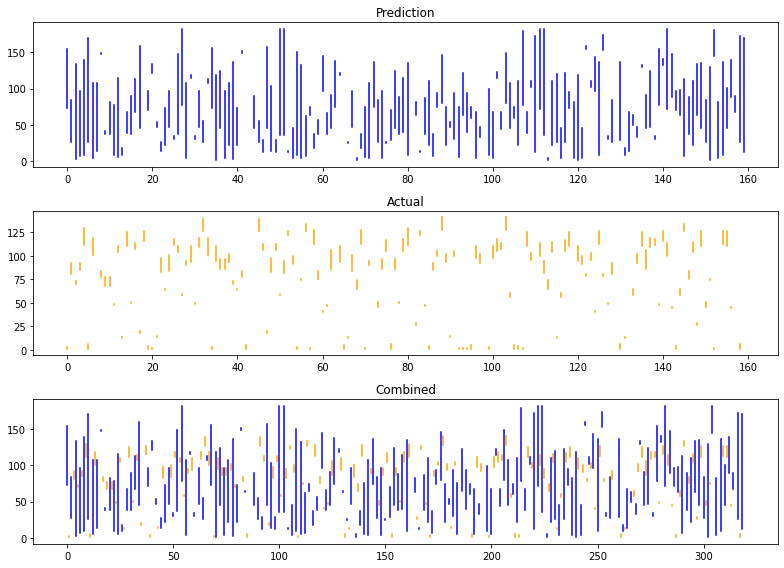

In [102]:
acc,eval_data = eval_loader(1,dump_equals=False)
plot_eval( eval_data)

In [103]:
#Open if you want to see output
#outputs_model = train_model()
#outputs_model

In [104]:


def get_text_atrange(tokens,begin,end):
  print("begin,end",begin,end)
  answer = ""
  for i in range(begin, end + 1):    
    if tokens[i][0:2] == '##': # If it's a subword token, then recombine it with the previous token.
        answer += tokens[i][2:]    
    else: # Otherwise, add a space then the token.
        answer += ' ' + tokens[i]    
  return answer

#used to combine tokens with prefix ##
def get_tokens_at_text(tokens):
  
  answer = ""
  for token in tokens:    
    if token[0:2] == '##': # If it's a subword token, then recombine it with the previous token.
        answer += token[2:]    
    else: # Otherwise, add a space then the token.
        answer += ' ' + token   
  return answer      

In [105]:
import numpy as np
def get_top_answers(possible_starts,possible_ends,input_ids):
  answers = []
  for start,end in zip(possible_starts,possible_ends):
    #+1 for end
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start:end+1]))
    answers.append( answer )
  return answers  

def answer_question(question,context,topN):

    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    model_out = model(**inputs.to(device))
     
    answer_start_scores = model_out["start_logits"]
    answer_end_scores = model_out["end_logits"]

    possible_starts = np.argsort(answer_start_scores.cpu().detach().numpy()).flatten()[::-1][:topN]
    possible_ends = np.argsort(answer_end_scores.cpu().detach().numpy()).flatten()[::-1][:topN]
    
    #get best answer
    answer_start = torch.argmax(answer_start_scores)  
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    answers = get_top_answers(possible_starts,possible_ends,input_ids )

    return { "answer":answer,"answer_start":answer_start,"answer_end":answer_end,"input_ids":input_ids,
            "answer_start_scores":answer_start_scores,"answer_end_scores":answer_end_scores,"inputs":inputs,"answers":answers,
            "possible_starts":possible_starts,"possible_ends":possible_ends}

import matplotlib.pyplot as plt

def plot_possible_answer(answer_map,expected_start,expected_end,title_postfix=""):
  start_scores = answer_map["answer_start_scores"]
  end_scores = answer_map["answer_end_scores"]
  tokens = tokenizer.decode( answer_map["input_ids"] ).split(" ") 
  #print("tokens",len(tokens),"---",len(answer_map["input_ids"]))
  tokens_ind = [ tokenizer.decode(t) for t in answer_map["input_ids"] ]
  #print("tokens_ind",len(tokens_ind))
  #print("tokens_ind",tokens_ind )
  fig,axes = plt.subplots(2,1)
  y_start = start_scores.cpu().detach().numpy().flatten()
  x_start = [i for i in range(len(y_start))]

  y_end = end_scores.cpu().detach().numpy().flatten()
  x_end = [i for i in range(len(y_end))]

  axes[0].bar(tokens_ind,y_start)
  axes[0].set_title("start scores( "+ str( len( y_start ) ) +") " + title_postfix )
  axes[0].figure.set_size_inches(10, 5)
  #axes[0].xaxis.set_labels( tokens_ind )
  axes[0].xaxis.set_tick_params(rotation=90)
  axes[0].axvline(expected_start,color="yellow")
  #print("axes[0].get_xticklabels()",axes[0].get_xticklabels())
  #axes[0].get_xticklabels()[0].set_color("yellow")
  #axes[0].set_xticklabels(tokens_ind, rotation = 90, ha="right")
  #axes[0].get_xticklabels()[expected_start].set_color("yellow")
  
  axes[1].bar(tokens_ind,y_end, color="orange")
  axes[1].set_title("end scores( "+ str( len( y_end ) ) +") " + title_postfix )
  axes[1].axvline(expected_end,color="red")
  axes[1].xaxis.set_tick_params(rotation=90)
  #axes[1].get_xticklabels()[expected_end].set_color("red")

  axes[0].autoscale(tight=True)
  axes[1].autoscale(tight=True)
  fig.tight_layout()
  #return fig   ,axes[0].get_xticklabels()         

Elapsed time for eval 1.128047 seconds.
Elapsed time for eval 1.130968 seconds.


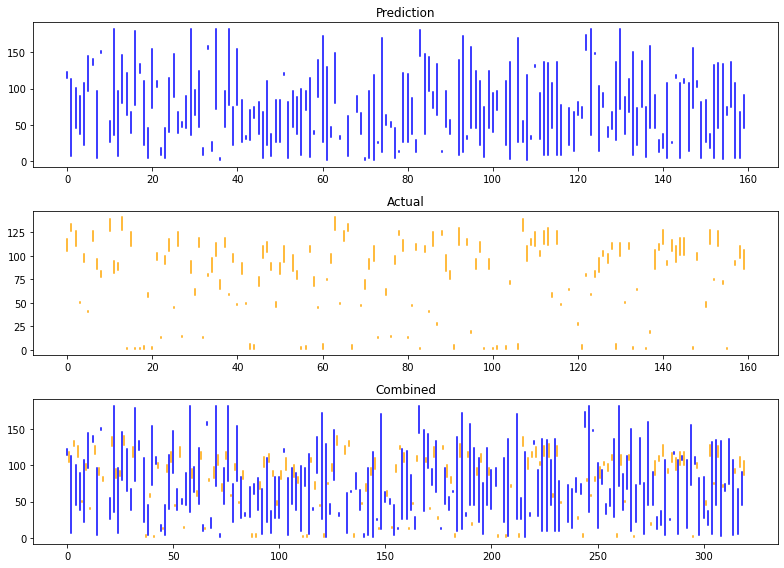

In [106]:
eval_loader(batch_size=1,dump_equals=True)
#no training yet so accuracy so low

acc,eval_data = eval_loader(1,dump_equals=False)
plot_eval( eval_data)

In [107]:
def dump_validation(index):
  print( val_contexts[index] )
  print( val_questions[index] )

dump_validation(5)

An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.The name of disease is Allergy is an illness when you have  continuous_sneezing  shivering  chills  watering_from_eyes . You must apply calamine cover area with bandage use ice to compress itching .
My problem is  continuous_sneezing  shivering  chills  watering_from_eyes


3

In [111]:
index = val_questions.index("What do you advice for Fungal infection")
question = val_questions[index] 
context = val_contexts[index] 
topN = 5
expected_start = 70 #109
expected_end = 84 #127

answer_steps = []

In [112]:
#print("question",question)
#get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"])

question What do you advice for Fungal infection


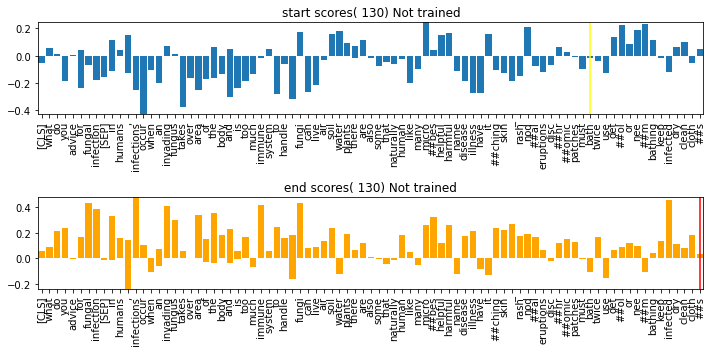

In [113]:
print("question",question)
answer_map = answer_question(question,context,topN)
answer_steps.append( answer_map )
plot_possible_answer(answer_map,expected_start,expected_end,"Not trained")

In [114]:
tokens = tokenizer.convert_ids_to_tokens(answer_map["input_ids"])
for index,t in enumerate(tokens):
  if index % 10 == 0:
    print("")
  print(f"{index} ) {t}", end =" ")


0 ) [CLS] 1 ) what 2 ) do 3 ) you 4 ) advice 5 ) for 6 ) fungal 7 ) infection 8 ) [SEP] 9 ) in 
10 ) humans 11 ) , 12 ) fungal 13 ) infections 14 ) occur 15 ) when 16 ) an 17 ) invading 18 ) fungus 19 ) takes 
20 ) over 21 ) an 22 ) area 23 ) of 24 ) the 25 ) body 26 ) and 27 ) is 28 ) too 29 ) much 
30 ) for 31 ) the 32 ) immune 33 ) system 34 ) to 35 ) handle 36 ) . 37 ) fungi 38 ) can 39 ) live 
40 ) in 41 ) the 42 ) air 43 ) , 44 ) soil 45 ) , 46 ) water 47 ) , 48 ) and 49 ) plants 
50 ) . 51 ) there 52 ) are 53 ) also 54 ) some 55 ) fungi 56 ) that 57 ) live 58 ) naturally 59 ) in 
60 ) the 61 ) human 62 ) body 63 ) . 64 ) like 65 ) many 66 ) micro 67 ) ##bes 68 ) , 69 ) there 
70 ) are 71 ) helpful 72 ) fungi 73 ) and 74 ) harmful 75 ) fungi 76 ) . 77 ) the 78 ) name 79 ) of 
80 ) disease 81 ) is 82 ) fungal 83 ) infection 84 ) is 85 ) an 86 ) illness 87 ) when 88 ) you 89 ) have 
90 ) it 91 ) ##ching 92 ) skin 93 ) _ 94 ) rash 95 ) nod 96 ) ##al 97 ) _ 98 ) skin 99 ) _ 
100 ) e

In [115]:
_ = train_model()

Elapsed time for training 2.904784 seconds.


question What do you advice for Fungal infection



keep infected area dry use clean cloth



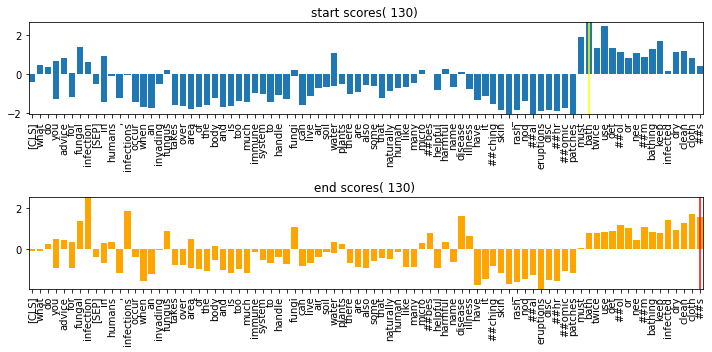

In [116]:
print("question",question)
answer_map = answer_question(question,context,topN)
answer_steps.append( answer_map )
print( "\n".join( get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"]) ) )
plot_possible_answer(answer_map,expected_start,expected_end)

Elapsed time for eval 1.197488 seconds.
accuracy eval : 0.553125


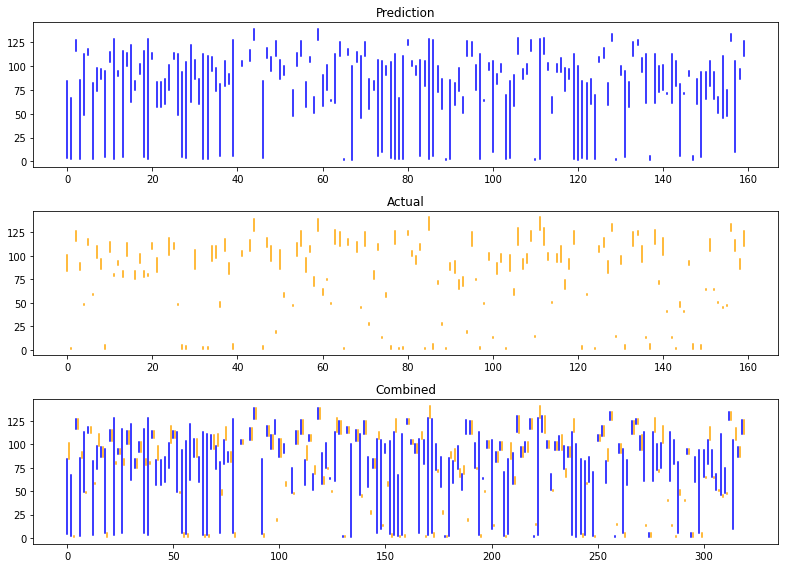

In [117]:
acc,eval_data = eval_loader(1,dump_equals=False)
print("accuracy eval :",acc)
plot_eval( eval_data)

In [118]:
_ = train_model()

Elapsed time for training 2.863359 seconds.


question What do you advice for Fungal infection
bath twice use detol or neem in bathing water keep infected area dry use clean cloths
twice use detol or neem in bathing water keep infected area dry use clean cloth

use detol or neem in bathing water keep infected area dry use



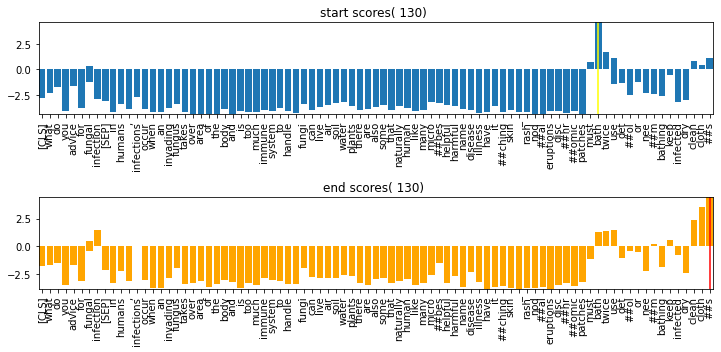

In [119]:
print("Question",question)
answer_map = answer_question(question,context,topN)
answer_steps.append( answer_map )
print( "\n".join( get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"]) ) )
plot_possible_answer(answer_map,expected_start,expected_end)

Elapsed time for eval 1.198547 seconds.
accuracy eval : 0.86875


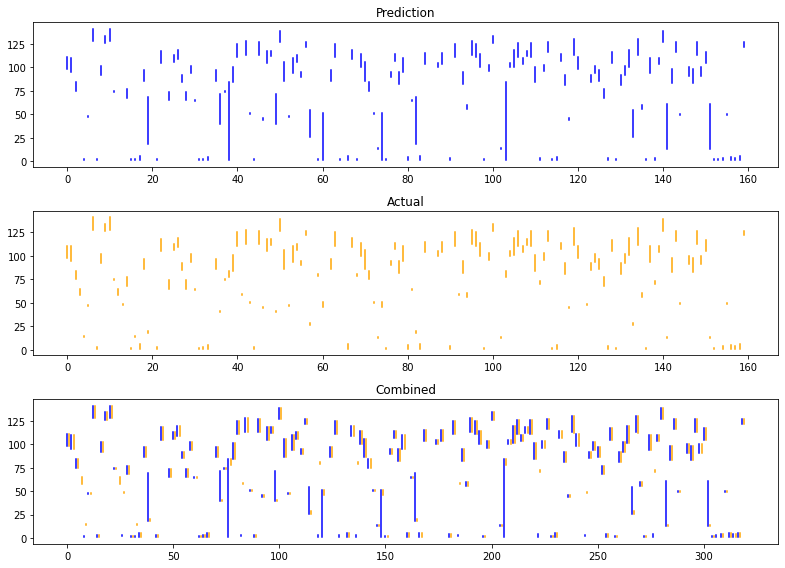

In [120]:
acc,eval_data = eval_loader(1,dump_equals=False)
print("accuracy eval :",acc)
plot_eval( eval_data)

Elapsed time for training 2.901363 seconds.
Elapsed time for eval 1.162849 seconds.
accuracy eval : 0.934375


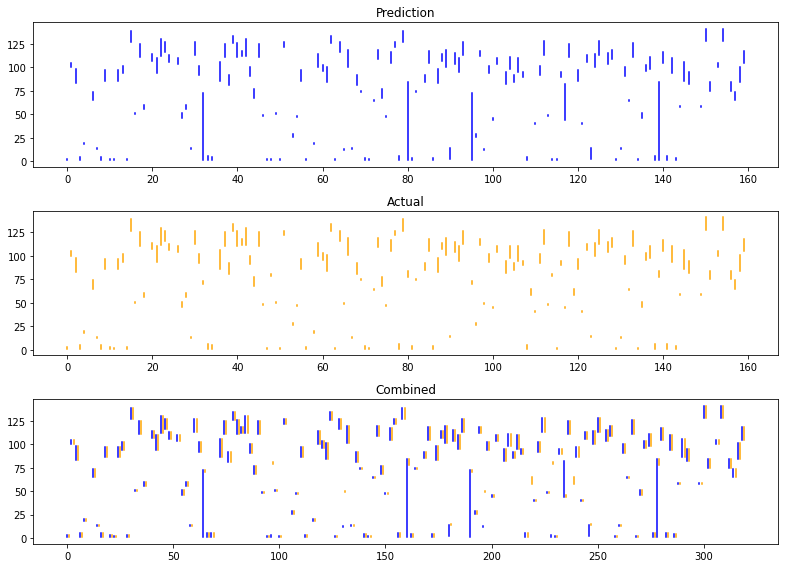

In [121]:
_ = train_model()
acc,eval_data = eval_loader(1,dump_equals=False)
print("accuracy eval :",acc)
plot_eval( eval_data)

question What do you advice for Fungal infection
bath twice use detol or neem in bathing water keep infected area dry use clean cloths

fungal infection




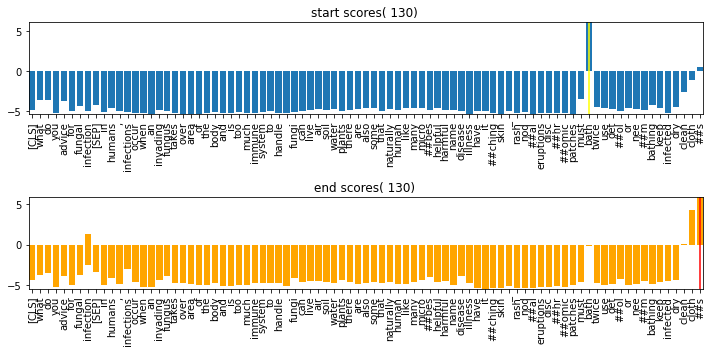

In [122]:
print("question",question)
answer_map = answer_question(question,context,topN)
answer_steps.append( answer_map )
print( "\n".join( get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"]) ) )
plot_possible_answer(answer_map,expected_start,expected_end)

Elapsed time for training 2.996536 seconds.
Elapsed time for eval 1.176285 seconds.
accuracy eval : 0.9625


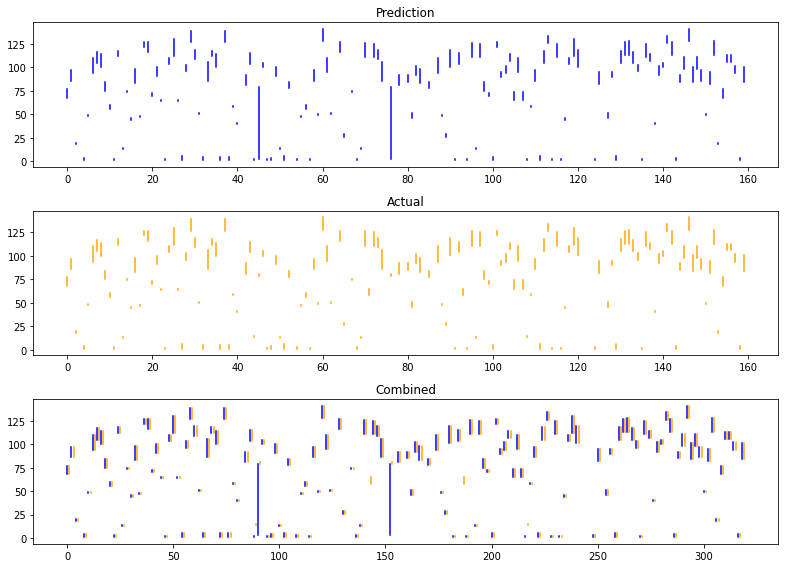

In [123]:
_ = train_model()
acc,eval_data = eval_loader(1,dump_equals=False)
print("accuracy eval :",acc)
plot_eval( eval_data)

In [124]:
print( answer_map["possible_starts"] )
print( answer_map["possible_ends"] )

[109 127  82 126 125]
[127 126  83 125 109]


question What do you advice for Fungal infection
bath twice use detol or neem in bathing water keep infected area dry use clean cloths
fungal infection is an illness when you have itching skin _ rash nodal _ skin _ eruptions dischromic _ patches. you must bath twice use detol or neem in bathing water keep infected area dry use clean cloth


infection is an illness when you have itching skin _ rash nodal _ skin _ eruptions dischromic _ patches. you must bath


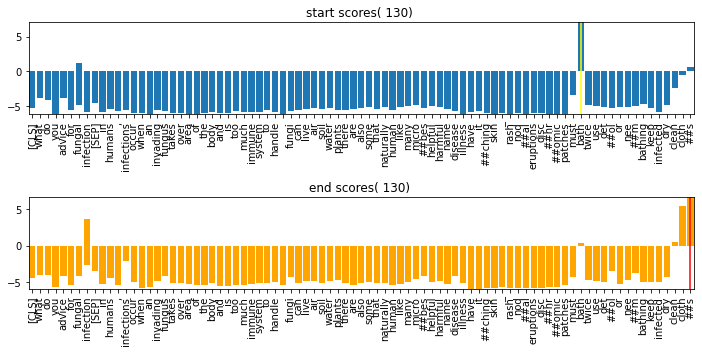

In [125]:
print("question",question)
answer_map = answer_question(question,context,topN)
answer_steps.append( answer_map )
print( "\n".join( get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"]) ) )
plot_possible_answer(answer_map,expected_start,expected_end)



Step  1


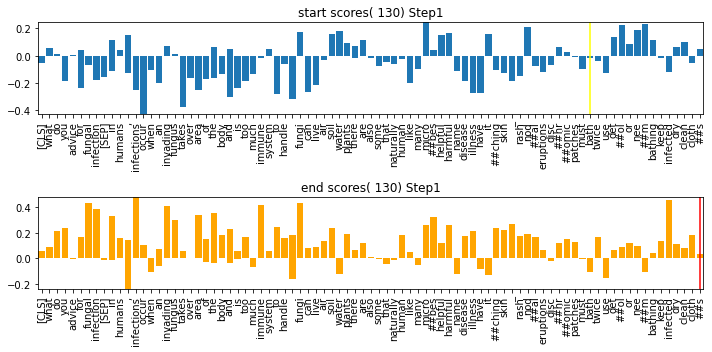



Step  2


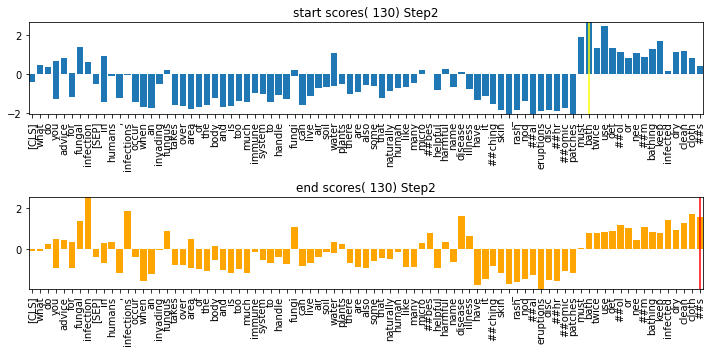



Step  3


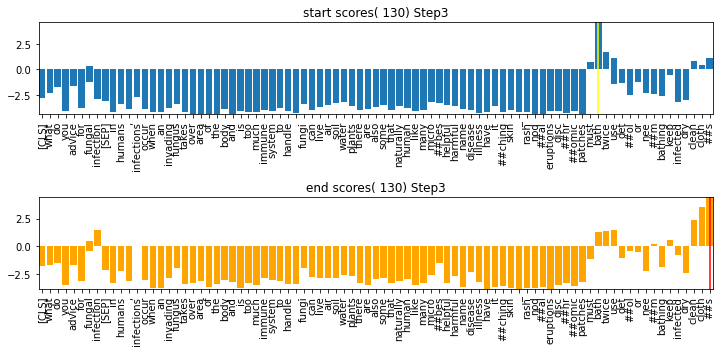



Step  4


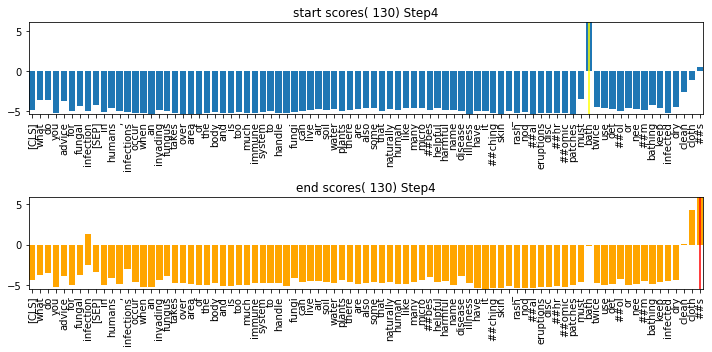



Step  5


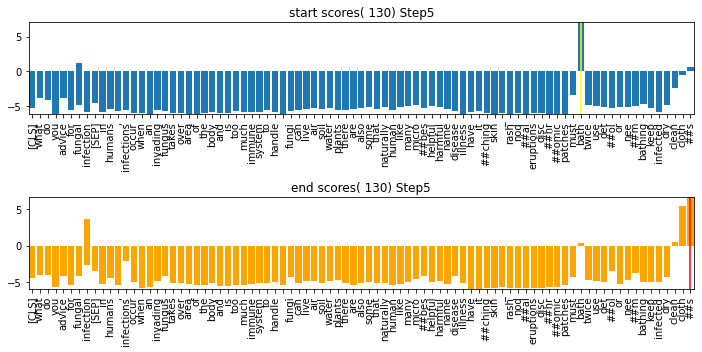

In [126]:
for index,a_map in enumerate(answer_steps):
  print("\n\nStep ",index+1)
  plot_possible_answer(a_map,expected_start,expected_end,"Step"+str(index+1))
  plt.show()
  
  


In [127]:
#answer_map["answer"]
print( "\n".join( get_top_answers(answer_map["possible_starts"],answer_map["possible_ends"],answer_map["input_ids"]) ) )
print("s",answer_map["possible_starts"])
print("e",answer_map["possible_ends"])

bath twice use detol or neem in bathing water keep infected area dry use clean cloths
fungal infection is an illness when you have itching skin _ rash nodal _ skin _ eruptions dischromic _ patches. you must bath twice use detol or neem in bathing water keep infected area dry use clean cloth


infection is an illness when you have itching skin _ rash nodal _ skin _ eruptions dischromic _ patches. you must bath
s [109  82 127 126  83]
e [127 126  83 125 109]


In [128]:
#template_question = "What do you advice for GERD"
template_question = "What is treatment for Dengue"
for index,q in enumerate(val_questions):
  if q == template_question:
    print( index )

In [129]:
sub_contexts = val_contexts[166:168]
sub_questions = val_questions[166:168]
sub_answers = val_answers[166:168]